# Kiasu 73

## Mathematical Model for Drug Diffusion in the Human Body

Pharmacokinetics is about studying the distribution of drugs in the human body. 
Understanding the concentration of a drug in different parts of the human body at different times is crucial for scientists to obtain a safety profile of the drug. 

Mathematically modelling processes has been increasingly important, especially in the Pharmaceutical industry. Although it is a theoretical process, with the right model, the distribution of a drug can be accurately predicted at various time points, and it can serve as an accurate prediction tool, especially if experimentation is not available.

For our proposed model, we categorised the human body into various compartments depending on how the drug is transported. In this presentation, we will be focusing on two models adapted from literature - Model II and Model III, which model drugs that are delivered intravenously into the human body. 

For every compartment model constructed, it will follow the following principles:
- The first-order kinetics describes the rate of drug transport among compartments.
- The proportionality constant is primarily dictated by the medicine, the compartment, and the individual‘s health.
- The rate of change of C(t) of a drug in every compartment is as follows:
    - $\dfrac{dC}{dt}$ = drug input rate - drug output rate

### Model II

Model II is a simple, 2-compartment model to model the diffusion for drugs delivered intravenously. 
The 2 main compartments identified are the blood and tissue.

|Equations                            | Initial State          |
|:---                                 |:---           |
|$\dfrac{dX}{dt}$ = -(b + e)X + cY    | X(0) = $b_{0}$|
|$\dfrac{dY}{dt}$ = bX - cY          | Y(0) = 0    |

Let *X and Y* represent the drug concentrations in the *blood and tissue compartments*.
*b$_{0}$* denotes the initial drug dosage. 
*b and c* represents the *forward and backward rate constants* of the drug consumption from blood to tissue, while *e* represents the *clearance rate* of the drug from the blood.

    
<img src = "https://ars.els-cdn.com/content/image/1-s2.0-S0960077922009894-gr2_lrg.jpg" alt = "Model II" width = "600" style = "float: left; margin-right: 10px;">    

0.999755859375
0.0625
0.132


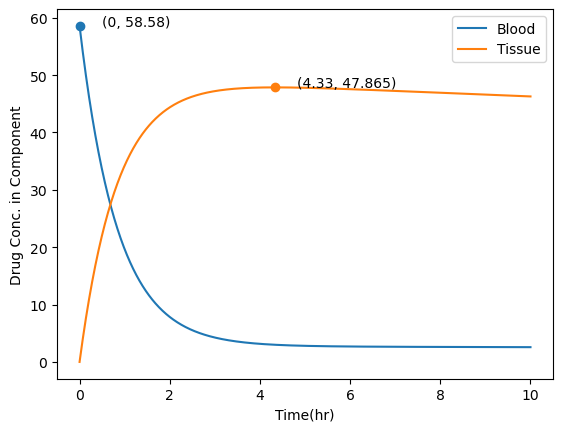

In [1]:
import matplotlib.pyplot as plt

b0 = 58.58
# b0 is initial drug dosage
# b = 0.90
# c = 0.4
# e = 0.2
dt = 0.01
# dt is time step
max_t = 10
# b is drug consumption rate through arterial blood reaching the tissue 
half_life = 5 # mins
no_cycles = 60 / half_life # Number of half-life cycles in an hour
b = 1 - (1/2)**no_cycles

# c is drug consumption rate in the tissue compartment 
# drug elimination rate from tissue half-life is 3hrs
# 50% of the drug is metabolised in the liver
# c = 0.5*(1/2)**3
c = 0.0625
# e is drug blood consumption rate
# Renal clearance is 0.66L/h
# Volume of human blood is estimated to be 5L
renal_clearance = 0.66
e = 0.66 / 5


print(b) # Rate constant in arterial blood
print(c) # Rate constant in tissue
print(e) # Clearance rate in venous blood

X = b0 
# X is drug conc. in the blood component
Y = 0
# Y is drug conc. in the tissue component
t = 0
# t is time(hr)

X_list = []
Y_list = []
t_list = []

while t <= max_t:
    t_list.append(t)
    X_list.append(X)
    Y_list.append(Y)
    
    dX = (-(b + e)*X + c*Y)*dt

    dY = (b*X - c*Y)*dt

    dZ = 0
    
    X += dX
    Y += dY 
    t += dt

plt.plot(t_list, X_list, label = 'Blood')
plt.plot(t_list, Y_list, label = 'Tissue')
plt.legend(loc='upper right')
plt.ylabel('Drug Conc. in Component')
plt.xlabel('Time(hr)')


# To plot max points
max_index_X = np.argmax(X_list)
max_index_Y = np.argmax(Y_list)
max_tx = [t_list[max_index_X]]
max_ty = [round(t_list[max_index_Y], 3)]
max_X = [X_list[max_index_X]]
max_Y = [round(Y_list[max_index_Y], 3)]

plt.scatter(max_tx, max_X)
for x, y in zip(max_tx, max_X):
    plt.text(x + 0.5, y,'({}, {})'.format(x, y))
plt.scatter(max_ty, max_Y)
for x, y in zip(max_ty, max_Y):
    plt.text(x + 0.5, y,'({}, {})'.format(x, y))
    

    
plt.show()

Although this model seems to mimic a standard concentration time curve in modelling drug diffusion, where the drug enters the blood circulatory system and slowly decreases over time, and a sharp increase of concentration in the tissue followed by a gradual decrease, having 2 compartments might be too simplistic and may not accurately mimic the complexity of the human body. 

Hence, we will like to introduce the next model below, model III, which is more representative of the human system. 

### Model III

We decided to use the model III which was presented in the research article to describe the movement of a drug delivered intravenously, which models the one-directional nature of blood flow in the cardiovascular system.

The capillary bed transports drugs carried in by venous blood to the target region. 
The remaining drug is withdrawn or restored to circulation via arterial blood simultaneously. 

The following equations describe the 3-compartment model that will be used to model the diffusion of drugs delivered intravenously:

|Equations                 | Initial State          |
|:---                      |:---           |
|$\dfrac{dW}{dt}$ = -bW    | W(0) = $b_{0}$|
|$\dfrac{dY}{dt}$ = bW - cY| V(0) = 0    |
|$\dfrac{dZ}{dt}$ = cY - eZ| Z(0) = 0    |

Let *W, Y and Z* represent the drug concentrations in the *arterial, tissue and venous blood compartments*.
*b$_{0}$* denotes the initial drug dosage. 
*b, c and e* are rate constants that represent the drug consumption through *arterial blood, tissue compartment, and blood clearance rate* respectively. 


<img src = "https://ars.els-cdn.com/content/image/1-s2.0-S0960077922009894-gr3_lrg.jpg" alt = "Model III" width = "600" style = "float: left; margin-right: 10px;">

### Objective

Our objective is to use model III to model the concentration of the drugs in the 3 compartments using real-life data, in the hopes of being able to accurately model real-life experimental pharmacokinetic studies. 

We decided to model the pharmacokinetics of the drug - Doxorubicin

### Parameters



From primary data from the Doxorubicin paper, we performed secondary calculations in order to estimate the rate constants needed to input into the 3 equations. **All rate constants are calculated in percentages**

In [2]:
# b
# As the half-life of the drug is 3-5 minutes,
# we can calculate the percentage of clearance from the arterial blood / hr

half_life = 5 # mins
no_cycles = 60 / half_life # Number of half-life cycles in an hour
b = 1 - (1/2)**no_cycles

# drug elimination rate from tissue half-life is 3hrs
# 50% of the drug is metabolised in the liver
# c = 0.5*(1/2)**3
c = 0.0625

# e
# Renal clearance is 0.66L/h
# Volume of human blood is estimated to be 5L
renal_clearance = 0.66
e = 0.66 / 5


print(b) # Rate constant in arterial blood
print(c) # Rate constant in tissue
print(e) # Clearance rate in venous blood

0.999755859375
0.0625
0.132


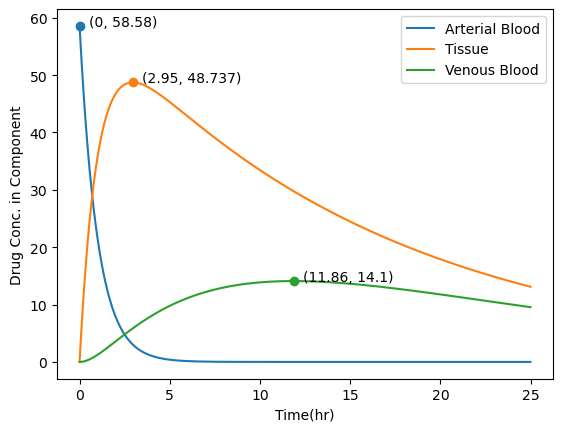

In [3]:
from matplotlib import pyplot as plt
import numpy as np
b0 = 58.58 # inital drug dosage, mg
dt = 0.01
max_t = 25

W = b0
V = 0
Z = 0
t = 0

V_list = []
W_list = []
Z_list = []
t_list = []

while t <= max_t:
    t_list.append(t)
    V_list.append(V)
    Z_list.append(Z)
    W_list.append(W)
    
    dW = (-b*W)*dt

    dV = (b*W - c*V)*dt
    
    dZ = (c*V - e*Z)*dt
    
    V += dV
    W += dW 
    Z += dZ 
    t += dt
    
plt.plot(t_list, W_list, label = 'Arterial Blood')
plt.plot(t_list, V_list, label = 'Tissue')
plt.plot(t_list, Z_list, label = 'Venous Blood')
plt.legend(loc='upper right')
plt.ylabel('Drug Conc. in Component')
plt.xlabel('Time(hr)')

max_index_W = np.argmax(W_list)
max_index_V = np.argmax(V_list)
max_index_Z = np.argmax(Z_list)
max_tw = [t_list[max_index_W]]
max_tv = [round(t_list[max_index_V], 3)]
max_tz = [round(t_list[max_index_Z], 3)]
max_w = [W_list[max_index_W]]
max_v = [round(V_list[max_index_V], 3)]
max_z = [round(Z_list[max_index_Z], 3)]

plt.scatter(max_tw, max_w)
for x, y in zip(max_tw, max_w):
    plt.text(x + 0.5, y,'({}, {})'.format(x, y))
plt.scatter(max_tv, max_v)
for x, y in zip(max_tv, max_v):
    plt.text(x + 0.5, y,'({}, {})'.format(x, y))
plt.scatter(max_tz, max_z)
for x, y in zip(max_tz, max_z):
    plt.text(x + 0.5, y,'({}, {})'.format(x, y))
    
plt.show()

## References

1. Shyamsunder; Bhatter, S.; Jangid, K.; Purohit, S. D. Fractionalized Mathematical Models for Drug Diffusion. Chaos, Solitons & Fractals 2022, 165, 112810. https://doi.org/10.1016/j.chaos.2022.112810.

2. Tacar, O.; Sriamornsak, P.; Dass, C. R. Doxorubicin: An Update on Anticancer Molecular Action, Toxicity and Novel Drug Delivery Systems. Journal of Pharmacy and Pharmacology 2013, 65 (2), 157–170. https://doi.org/10.1111/j.2042-7158.2012.01567.x.

3. Harahap, Y.; Ardiningsih, P.; Corintias Winarti, A.; Purwanto, D. J. Analysis of the Doxorubicin and Doxorubicinol in the Plasma of Breast Cancer Patients for Monitoring the Toxicity of Doxorubicin. Drug Design, Development and Therapy 2020, 14, 3469–3475. https://doi.org/10.2147/DDDT.S251144.

4. Frost, B.-M.; Eksborg, S.; Björk, O.; Abrahamsson, J.; Behrendtz, M.; Castor, A.; Forestier, E.; Lönnerholm, G. Pharmacokinetics of Doxorubicin in Children with Acute Lymphoblastic Leukemia: Multi-Institutional Collaborative Study. Medical and Pediatric Oncology 2002, 38 (5), 329–337. https://doi.org/10.1002/mpo.10052.

5. Doxorubicin. Andrew Gaya. http://www.andygaya.com/chemotherapy/doxorubicin (accessed 2023-03-31).

# The End 
Code below is not part of the presentation

In [4]:
import math
from matplotlib import pyplot as plt

Text(0.5, 0, 'Time(hr)')

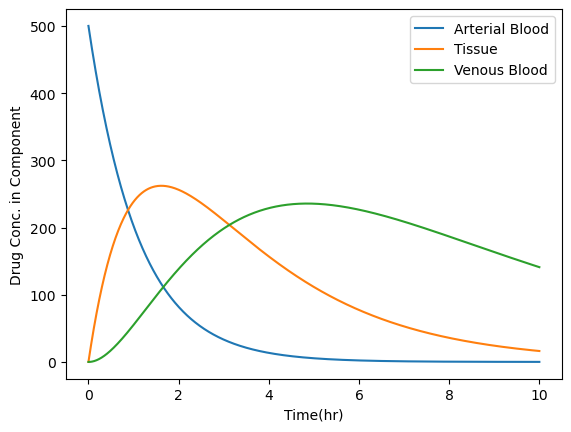

In [5]:
b0 = 500
# b0 is initial drug dosage
b = 0.90
# b is drug consumption rate through arterial blood reaching the tissue 
c = 0.4
# c is drug consumption rate in the tissue compartment 
e = 0.2
# e is drug blood consumption rate
dt = 0.01
# dt is time step
max_t = 10

W = b0 
# W is drug conc. in the arterial blood component
V = 0
# V is drug conc. in the tissue component
Z = 0
# V is drug conc. in the venous blood component
t = 0
# t is time(hr)

V_list = []
W_list = []
Z_list = []
t_list = []

while t <= max_t:
    t_list.append(t)
    V_list.append(V)
    Z_list.append(Z)
    W_list.append(W)
    
    dW = (-b*W)*dt

    dV = (b*W - c*V)*dt
    
    dZ = (c*V - e*Z)*dt
    
    V += dV
    W += dW 
    Z += dZ 
    t += dt

plt.plot(t_list, W_list, label = 'Arterial Blood')
plt.plot(t_list, V_list, label = 'Tissue')
plt.plot(t_list, Z_list, label = 'Venous Blood')
plt.legend(loc='upper right')
plt.ylabel('Drug Conc. in Component')
plt.xlabel('Time(hr)')